# 36118 Applied Natural Language Processing
## AT2

In [53]:
# Import package
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.collocations import *
from gensim.utils import simple_preprocess

In [54]:
# Import dataset
df = pd.read_csv(r'/Users/charlotteli/Desktop/UTS/Year1 Sem2/36118 Applied Natural Language Processing/AT2/tripadvisor_hotel_reviews.csv')

In [55]:
df.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


## Data Cleaning

In [56]:
mask = df.duplicated()
print(df[mask])

Empty DataFrame
Columns: [Review, Rating]
Index: []


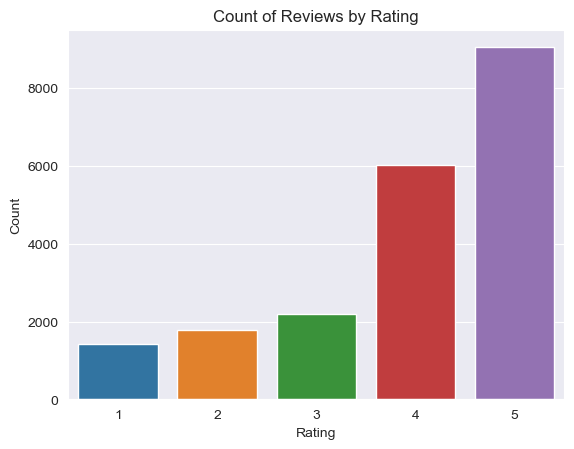

In [57]:
sns.countplot(x='Rating', data=df)
plt.title('Count of Reviews by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [58]:
assert df.duplicated().sum() == 0

## Word count


In [59]:
# create a function that returns word count
def word_count(text):
    wc = len(text.split())
    return wc

In [60]:
df['word_count'] = df['Review'].apply(word_count)
df['word_count'].describe

<bound method NDFrame.describe of 0         87
1        250
2        217
3         89
4        191
        ... 
20486    109
20487     39
20488     63
20489    781
20490     90
Name: word_count, Length: 20491, dtype: int64>

I create a histogram to visualize the distribution of word count after counting the number of words.

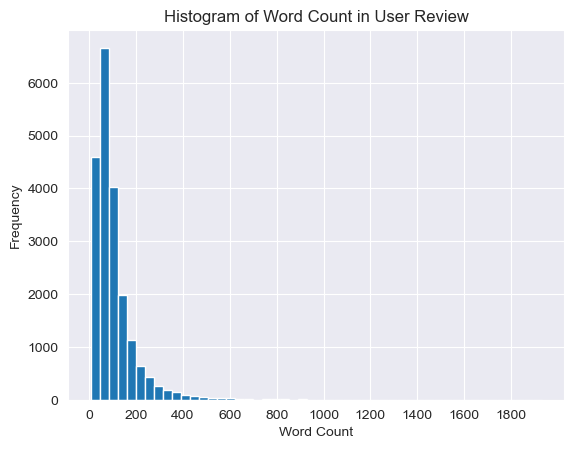

In [61]:
df['word_count'].hist(bins = 50)
plt.title("Histogram of Word Count in User Review")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.xticks(range(0, max(df['word_count']), 200))

plt.show()

In [62]:
grouped = df.groupby('Rating')['word_count'].mean()
grouped


Rating
1    112.365236
2    126.601227
3    114.705586
4    107.771651
5     93.963773
Name: word_count, dtype: float64

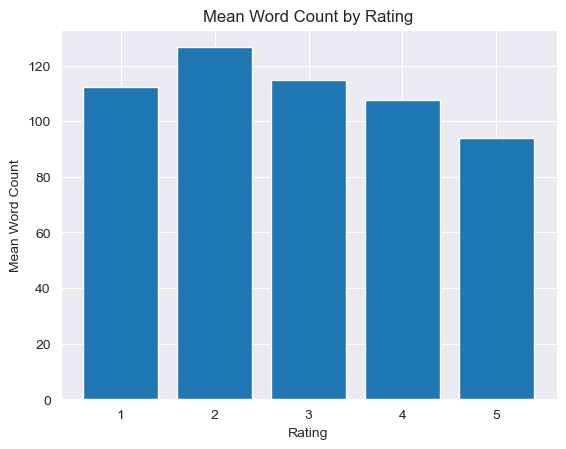

In [63]:
plt.bar(x=grouped.index, height=grouped)

# set the plot title and axes labels
plt.title("Mean Word Count by Rating")
plt.xlabel("Rating")
plt.ylabel("Mean Word Count")

plt.show()

# tokenize

In [64]:
df['Review'] = df['Review'].str.replace('stayed', 'stay', case=False)

In [65]:
# converting series to string
Review = df['Review'].to_string()

# convert all the characters to lowercase.
Review = Review.lower()

# create word tokens
tokenized_Review = word_tokenize(Review)

In [66]:
#stopwords
stop_words = stopwords.words("english")
print(stop_words)

# nltk.download('stopwords')
# nltk.download('punkt')

#Add custom stopwords to the list
stop_words.extend(["cnn", "'s", "a", "the", "i'm", "n't", "will", "'m"])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [67]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [68]:
# create function extracting all the individual words in the text
def extract_word(text):

    temp = []
    
    for w in text:    
        if w not in stop_words:
            #add all filtered tokens excluding stopwords in this list below
            temp.append(w)
    
    import string
    # punctuations
    punctuations = list(string.punctuation)
    
    # Add custom punctuations to the list
    punctuations.append("...")

    # Create another variable to store all clean tokens
    temp_clean=[]
    for i in temp:
        if i not in punctuations:
            temp_clean.append(i)

    return temp_clean

In [69]:
df['sentiment'] = df['Rating'].apply(lambda x: 'positive' if x > 3
                                     else 'negative' if x < 3
                                     else 'neutral')

In [70]:
# use the function extract_word to clean the list and save into a new list.
review_clean = extract_word(tokenized_Review)

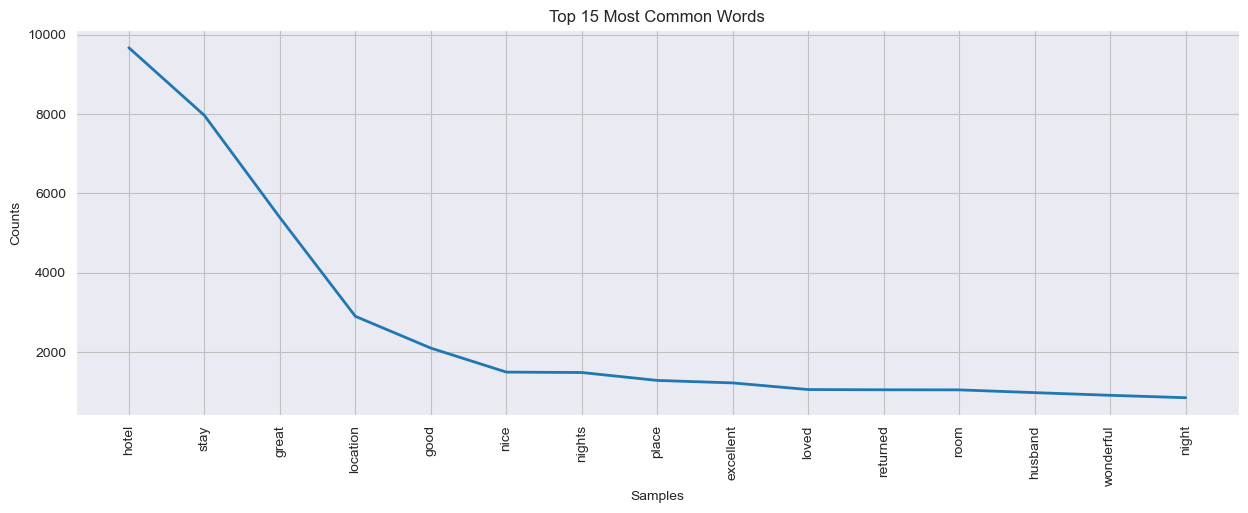

[('hotel', 9670), ('stay', 7965), ('great', 5391), ('location', 2901), ('good', 2100), ('nice', 1495), ('nights', 1484), ('place', 1285), ('excellent', 1222), ('loved', 1055), ('returned', 1049), ('room', 1047), ('husband', 977), ('wonderful', 910), ('night', 849)]


In [71]:
all_words = nltk.FreqDist(review_clean)
plt.figure(figsize=(15,5))
plt.title("Top 15 Most Common Words")
all_words.plot(15)

print(all_words.most_common(15))

In [72]:
Positive_sent = df[df['sentiment']== 'positive']
Neutral_sent = df[df['sentiment']== 'neutral']
Negative_sent = df[df['sentiment']== 'negative']

In [73]:
Positive_sent

,Review,Rating,word_count,sentiment
0,nice hotel expensive parking got good deal sta...,4,87,positive
3,"unique, great stay, wonderful time hotel monac...",5,89,positive
4,"great stay great stay, went seahawk game aweso...",5,191,positive
5,love monaco staff husband stay hotel crazy wee...,5,134,positive
6,"cozy stay rainy city, husband spent 7 nights m...",5,101,positive
...,...,...,...,...
20480,great play stay stay loyal inn package deal ha...,5,33,positive
20482,great choice wife chose best western quite bit...,5,105,positive
20483,good bed clean convenient just night happy sta...,4,61,positive
20486,"best kept secret 3rd time staying charm, not 5...",5,109,positive


In [74]:
Positive_Review = Positive_sent['Review'].to_string()
Positive_Review = Positive_Review.lower()
tokenized_Positive = word_tokenize(Positive_Review)
positive_clean = extract_word(tokenized_Positive)

[('hotel', 7617), ('stay', 6181), ('great', 4828), ('location', 2280), ('good', 1449), ('nights', 1178), ('excellent', 1165), ('nice', 1131), ('place', 1027), ('loved', 1024), ('wonderful', 886), ('returned', 845), ('best', 754), ('husband', 752), ('fantastic', 741)]


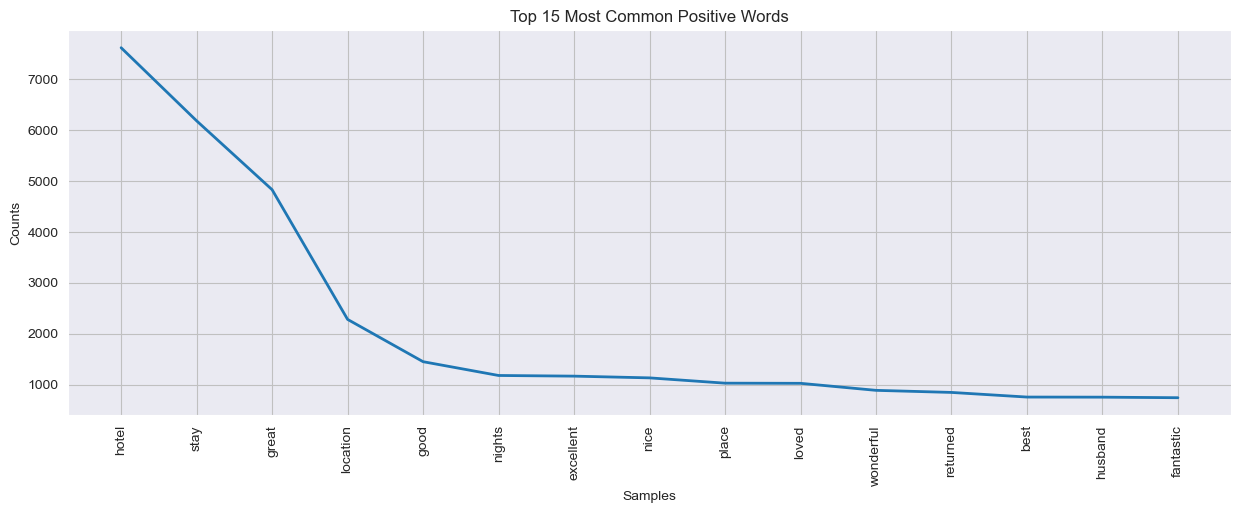

In [75]:
positive_words = nltk.FreqDist(positive_clean)

# Get the 20 most common words and their frequencies
print(positive_words.most_common(15))

from nltk.probability import FreqDist

plt.figure(figsize=(15,5))
plt.title("Top 15 Most Common Positive Words")
positive_words.plot(15)
plt.show()


In [76]:
Neutral_Review = Neutral_sent['Review'].to_string()
# convert all the characters to lowercase.
Neutral_Review = Neutral_Review.lower()
tokenized_Neutral = word_tokenize(Neutral_Review)
Neutral_clean = extract_word(tokenized_Neutral)

[('hotel', 904), ('stay', 765), ('location', 427), ('good', 419), ('great', 359), ('nice', 258), ('room', 182), ('nights', 171), ('ok', 167), ('bad', 119), ('rooms', 108), ('night', 108), ('booked', 97), ('average', 93), ('place', 89)]


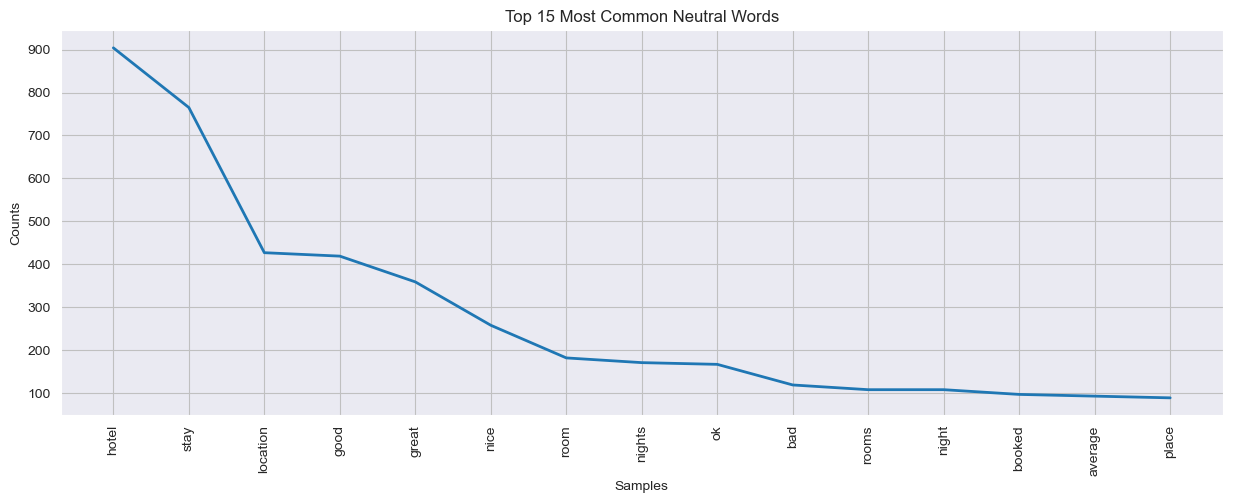

In [77]:
Neutral_words = nltk.FreqDist(Neutral_clean)

# Get the 20 most common words and their frequencies
print(Neutral_words.most_common(15))

plt.figure(figsize=(15,5))
plt.title("Top 15 Most Common Neutral Words")
Neutral_words.plot(15)
plt.show()


In [78]:
Negative_sent = Negative_sent['Review'].to_string()
# convert all the characters to lowercase.
Negative_sent = Negative_sent.lower()
tokenized_Neg = word_tokenize(Negative_sent)
Negative_clean = extract_word(tokenized_Neg)

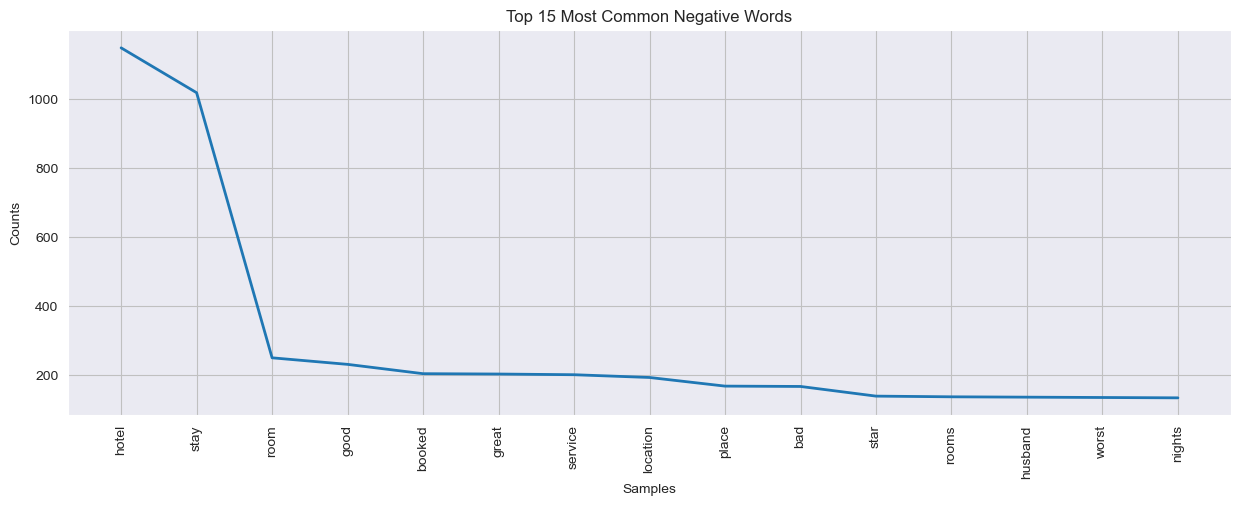

[('hotel', 1149), ('stay', 1019), ('room', 251), ('good', 232), ('booked', 205), ('great', 204), ('service', 202), ('location', 194), ('place', 169), ('bad', 168), ('star', 140), ('rooms', 138), ('husband', 137), ('worst', 136), ('nights', 135)]


In [79]:
Negative_word = nltk.FreqDist(Negative_clean)
plt.figure(figsize=(15,5))
plt.title("Top 15 Most Common Negative Words")
Negative_word.plot(15)

print(Negative_word.most_common(15))

# Topic Modelling

In [81]:
def tokenize(text):
    text = simple_preprocess(str(text), deacc=True)
    return text

tokenized_data = df["Review"].apply(tokenize)

In [85]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
data = [' '.join(review) for review in tokenized_data]
 
vectorizer = CountVectorizer(
    strip_accents = 'unicode', stop_words = 'english',
    token_pattern = r'\b[a-zA-Z]{3,}\b', max_df = 0.5, min_df = 10
)
X = vectorizer.fit_transform(data)
vocab = vectorizer.vocabulary_

In [87]:
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

LatentDirichletAllocation(random_state=42)

In [88]:
n_top_words = 10
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    message = "Topic #%d: " % topic_idx
    message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    print(message)

Topic #0: location breakfast good rooms clean helpful friendly excellent just small
Topic #1: beach resort food good did just people nice time pool
Topic #2: service wonderful place beautiful best pool rooms loved just friendly
Topic #3: did night rooms desk like nice bed just check time
Topic #4: location good clean walk nice breakfast rooms city station helpful
Topic #5: service did got just day said told went called asked
Topic #6: service rooms good new business location hotels excellent city food
Topic #7: beach pool food service did day good kids resort restaurant
Topic #8: resort day did beach time trip went airport just got
Topic #9: breakfast nice good small bathroom coffee free area view bed


In [89]:
def display_topics(model, feature_names, num_top_words):
    num_topics = model.n_components
    num_cols = 3
    num_rows = 4
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
    axs = axs.flatten()
    for topic_idx, topic in enumerate(model.components_):
        axs[topic_idx].barh(range(num_top_words), topic.argsort()[:-num_top_words - 1:-1][::-1])
        axs[topic_idx].set_yticks(range(num_top_words))
        axs[topic_idx].set_yticklabels([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]][::-1])
        axs[topic_idx].set_xlabel("Topic %d weightage" % (topic_idx))
        axs[topic_idx].set_title("Topic %d" % (topic_idx))
    plt.tight_layout()
    plt.show()


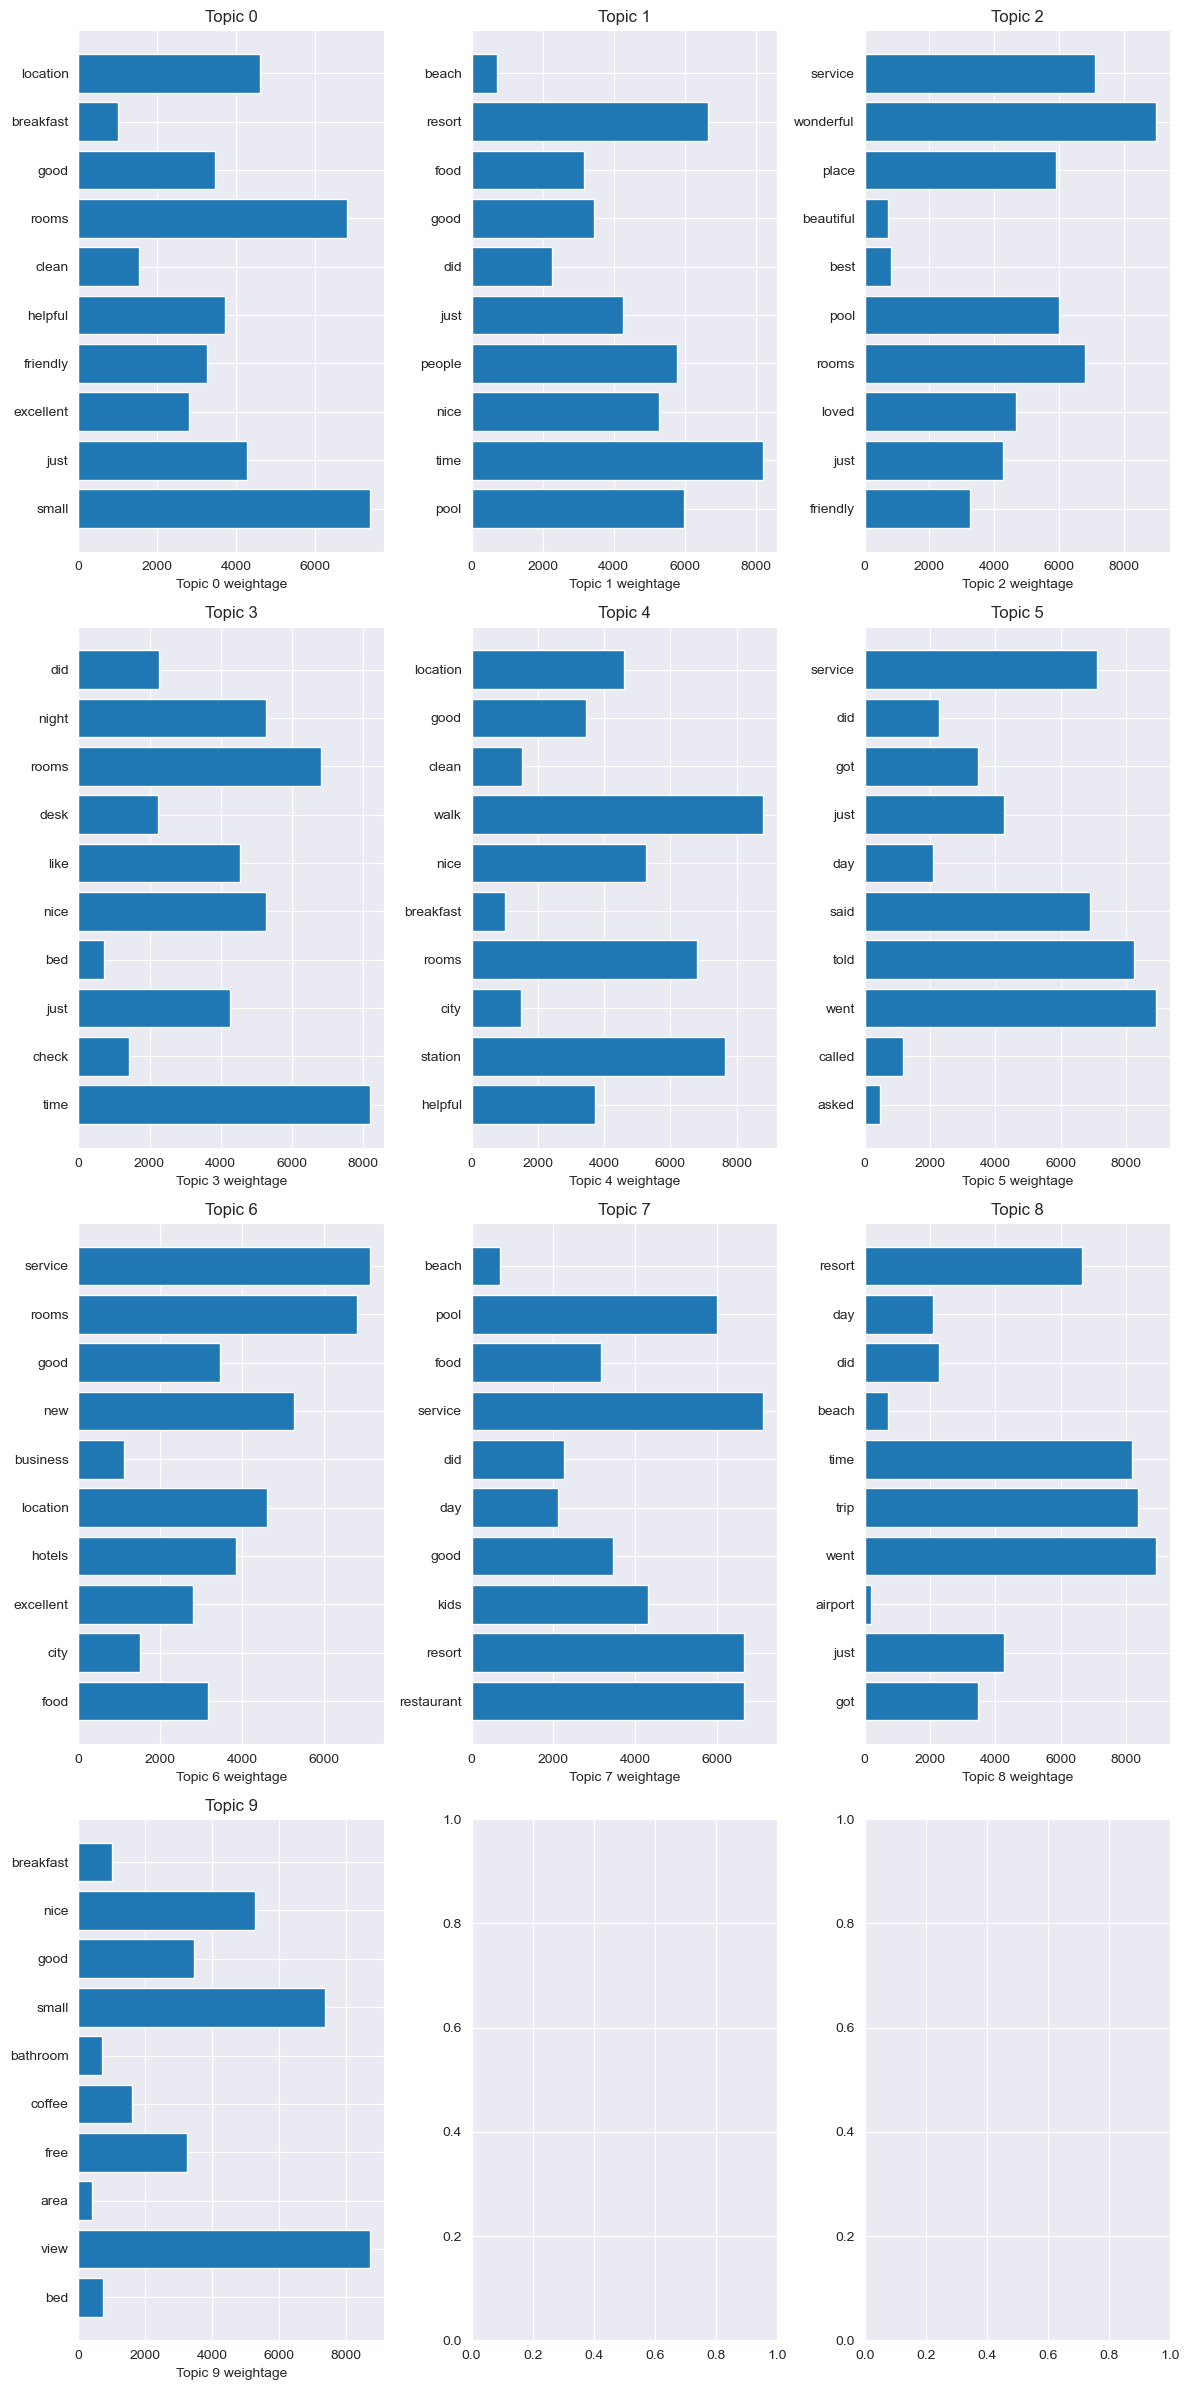

In [90]:
num_topics = 5
num_top_words = 10
display_topics(lda, feature_names, num_top_words)
